## Reservas de Hotel

### Definicion de Objetivo y Contexto Comercial
Este conjunto de datos de reservas de hotel contiene informacion sobre los precios promedios de las habitaciones y de las reservas; el numero de reservas anteriores canceladas por el cliente; fechas de ingreso y salida; el tipo de habitacion; plaza de aparcamiento; plan de comidas, etc. Las razones tipicas de las cancelaciones incluyen varios factores, a veces se facilita con la opcion de hacerlo gratis o a un bajo costo, que es beneficioso para el cliente pero no asi para los hoteles. ¿Se podrá predecir si el cliente cumplirá o cancelará la reserva? 

El conjunto de datos contiene información sobre las reservas de dos hoteles de Portugal (un complejo turístico y un hotel urbano) cuyo alcance esta previsto en un periodo comprendido entre el 1 de julio de 2015 y el 31 de agosto de 2017.

El objetivo general de este analisis es crear un modelo de ML para predecir si un usuario cancelará o no una reserva de hotel y sacar conclusiones a partir de esa posibilidad.


### Contexto Analitico
Para ambos hoteles se recopiló la misma información: 31 variables que describen 40.060 observaciones para el resort y 79.330 observaciones para el hotel urbano. Es decir, el conjunto de datos contiene información sobre 119.390 reservas de hotel, incluidas las que se cancelaron. Se trata de información real, por lo que se eliminaron todos los elementos que pudieran identificar a hoteles o clientes.



## Variables

hotel : Hotel (H1 = Resort Hotel o H2 = City Hotel)

is_canceled :Valor que indica si la reserva se ha cancelado (1) o no (0)

lead_time : Número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada

arrival_date_year : Año de la fecha de llegada

arrival_date_month : Mes de la fecha de llegada

arrival_date_week_number : Número de semana del año para la fecha de llegada

arrival_date_day_of_month : Día de llegada

stays_in_weekend_nights : Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para alojarse en el hotel

stays_in_week_nights : Número de noches de la semana (de lunes a viernes) que el huésped se alojó o reservó para alojarse en el hotel

adults : Número de adultos

children : Número de niños

babies : Número de bebés

meal: Tipo de comida reservada. Las categorías se presentan en paquetes de comidas de hospitalidad estándar: Sin definir/SC: sin paquete de comidas; BB: alojamiento y desayuno; HB: media pensión (desayuno y otra comida, normalmente cena); FB: pensión completa (desayuno, almuerzo y cena).

country : País de origen. Las categorías se representan en el formato ISO 3155-3:2013

market_segment : Designación del segmento de mercado. En las categorías, el término "AT" significa "agencias de viajes" y "TO" significa "turoperadores".

distribution_channel : Canal de distribución de reservas. El término "AT" significa "Agencias de Viajes" y "TO" significa "Tour Operadores".

is_repeated_guest :Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0)

previous_cancellations : Número de reservas anteriores canceladas por el cliente antes de la reserva actual

previous_bookings_not_canceled : Número de reservas anteriores no canceladas por el cliente antes de la reserva actual

reserved_room_type : Código del tipo de habitación reservada. El código se presenta en lugar de la designación por razones de anonimato.

booking_changes : Número de cambios/enmiendas realizados en la reserva desde el momento en que se introdujo la reserva en el PMS hasta el momento de la facturación o la cancelación.

required_car_parking_spaces : Número de plazas de aparcamiento que necesita el cliente

reservation_status : Último estado de la reserva, asumiendo una de las tres categorías: Cancelada: el cliente ha cancelado la reserva; Check-Out: el cliente se ha registrado pero ya se ha marchado; No-Show: el cliente no se ha registrado y ha informado al hotel del motivo. 

reservation_status_date : Fecha en la que se estableció el último estado. Esta variable se puede utilizar junto con ReservationStatus para saber cuándo se canceló la reserva o cuándo abandonó el cliente el hotel.


## Fuente: Kaggle.com

https://www.kaggle.com/code/marta99/hotel-booking-demand-eda-visualization/data

## Aquí se plantean algunas preguntas para el análisis:

¿Cuál es el mes con más llegadas de huéspedes?

¿Cuánto tiempo suelen quedarse los huéspedes en el hotel?

¿Cuál es la tarifa media diaria (ADR) a lo largo del año?

¿Cuántas reservas se cancelaron del total?

¿Cuál es el tipo de depósito más frecuente en las reservas canceladas?

¿Qué tipos de clientes son los más habituales en cada hotel?

¿Qué hotel prefieren los adultos con niños?

¿Cuál es el segmento de mercado y el canal de distribución más fuerte?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join
import datetime as dt

In [2]:
df = pd.read_csv('data/HotelReservations.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Convertir tipos de datos a string

df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['previous_cancellations'] = df['previous_cancellations'].astype('str')
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].astype('str')
df['hotel'] = df['hotel'].astype('str')

columns_to_string = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month','is_repeated_guest','is_canceled','previous_cancellations','previous_bookings_not_canceled','hotel']

for element in columns_to_string:

 df[element]=df[element].astype('str')

 # Creando la columna arrival_date y cambiando su tipo de datos a fecha y hora

df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors = 'coerce')

# Combinar niños y bebés juntos como niños

df['kids'] = df['children'] + df['babies']

# Creando la columna total_members

df['total_members'] = df['kids'] + df['adults']

# Total de noches por reserva

df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Cambio de la columna arrival_date_month para mostrar el número de mes en lugar del nombre del mes

df['arrival_date_month'] = df['arrival_date'].dt.month

# Crear una columna family

df['family'] = np.where(df['kids'] > 0, '1', '0')

# Conjunto de datos sólo con reservas confirmadas

confirmed_bookings = df[df['is_canceled'] == '0']

# Conjunto de datos sólo con reservas canceladas

canceled_bookings = df[df['is_canceled'] == '1']

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,kids,total_members,total_nights,family
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0.0,2.0,0,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0.0,2.0,0,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,2015-07-01,0.0,1.0,1,0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,2015-07-01,0.0,1.0,1,0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,2015-07-01,0.0,2.0,2,0


In [6]:
df.describe()


,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids,total_members,total_nights
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119386.000000,119390.000000
mean,104.011416,6.552483,27.165173,0.927599,2.500302,1.856403,0.103890,0.007949,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,0.111839,1.968229,3.427900
std,106.863097,3.090619,13.605138,0.998613,1.908286,0.579261,0.398561,0.097436,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,0.412567,0.722400,2.557439
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,69.000000,7.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,160.000000,9.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,0.000000,2.000000,4.000000
max,737.000000,12.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,10.000000,55.000000,69.000000


# Exploración de Datos (EDA)


## Analisis Univariado
### ¿Cuántas reservas se cancelaron del total? 

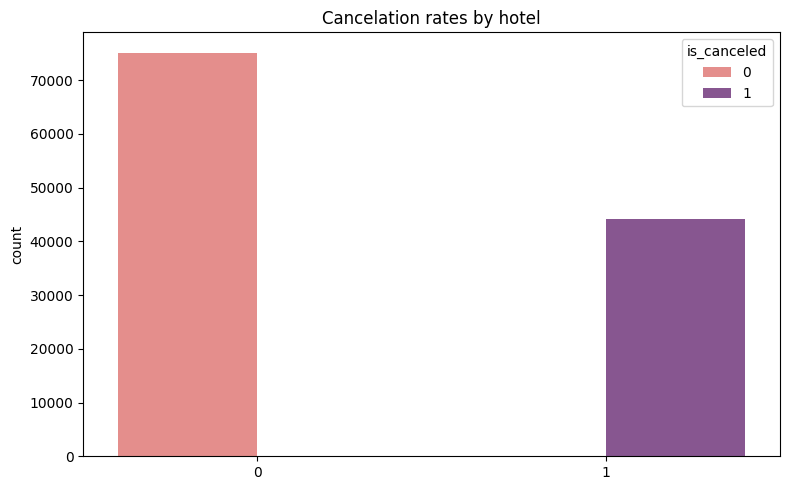

In [7]:
plt.figure(figsize = (8, 5))

sns.countplot(x = 'is_canceled', data = df, hue = 'is_canceled', palette = 'magma_r', alpha = 0.8).set(xlabel = None)
plt.title('Cancelation rates by hotel')


plt.tight_layout()


In [8]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

#### De un total de 119.390 se cancelaron unas 44.224 reservas de hotel.

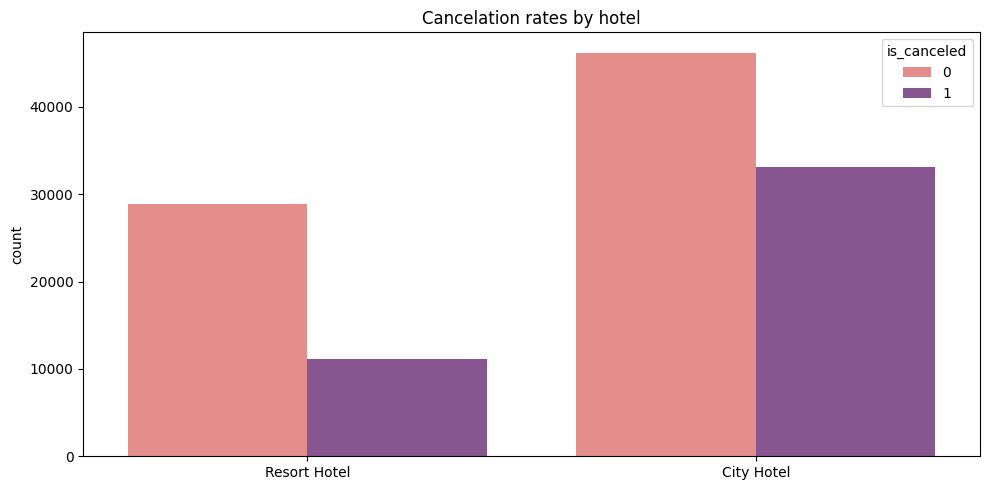

In [9]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'hotel', data = df, hue = 'is_canceled', palette = 'magma_r', alpha = 0.8).set(xlabel = None)
plt.title('Cancelation rates by hotel')

plt.tight_layout()

#### Hay altas tasas de cancelaciones en ambos hoteles.

### Variable is_canceled
Valor que indica si la reserva se ha cancelado (1) o no (0)

In [21]:
df['is_canceled'].describe()


count     119390
unique         2
top            0
freq       75166
Name: is_canceled, dtype: object

In [22]:
# Moda de la variable
df['is_canceled'].value_counts(normalize = True).head(10)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [23]:
moda = df["is_canceled"].mode()
print(moda)

0    0
Name: is_canceled, dtype: object


In [24]:
media = df["is_canceled"].mean()
print(media)

inf


In [26]:
mediana = df["is_canceled"].median()
print(mediana)

0.0


#### Hay altas tasas de cancelaciones en ambos hoteles.

### ¿Cuál es el tipo de depósito más frecuente para reservas canceladas? 

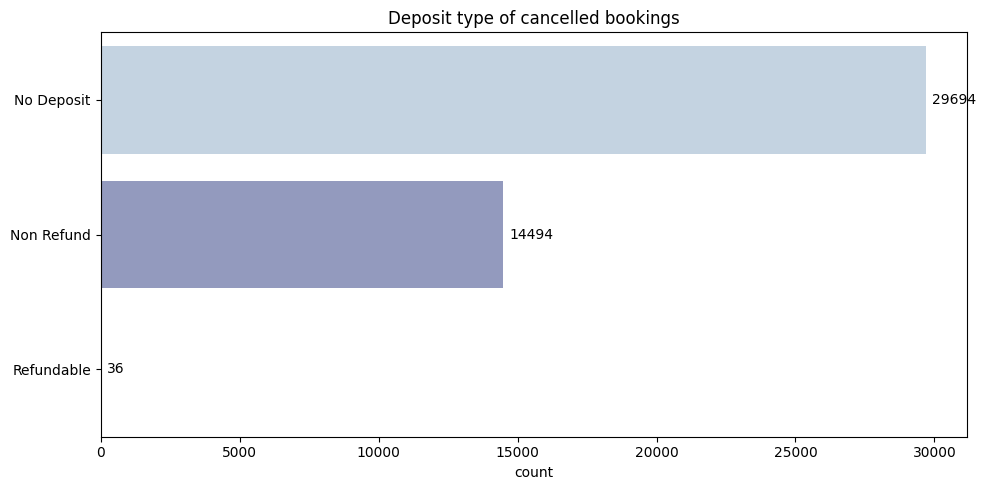

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(ax = ax, y = 'deposit_type', data = canceled_bookings, orient = "h" ,palette = 'BuPu').set(ylabel = None)
ax.bar_label(ax.containers[0], padding = 4)
plt.title('Deposit type of cancelled bookings')

plt.tight_layout()

### Variable deposit_type
Indicación de si el cliente hizo un depósito para garantizar la reserva. Esta variable puede asumir tres categorías: Sin depósito; No reembolsable: se realizó un depósito por valor del coste total de la estancia; Reembolsable: se realizó un depósito por valor inferior al coste total de la estancia.

In [26]:
df["deposit_type"].dtype
df["deposit_type"].describe()

count         119390
unique             3
top       No Deposit
freq          104641
Name: deposit_type, dtype: object

In [27]:
moda = df["deposit_type"].mode()
print(moda)

0    No Deposit
Name: deposit_type, dtype: object


#### La mayoría de las reservas canceladas no requerían depósito.

### ¿Qué hotel es el preferido por los adultos con niños? 

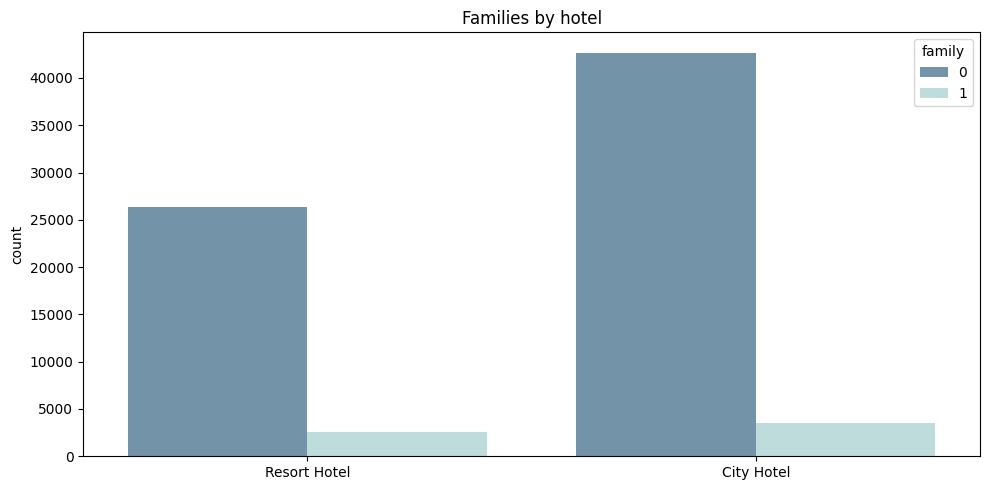

In [11]:
plt.figure(figsize = (10, 5))

palette = ["#457b9d", "#a8dadc"]

sns.countplot(data = confirmed_bookings, x = 'hotel', hue = 'family', palette = palette, alpha = 0.8).set(xlabel = None)
plt.title('Families by hotel')

plt.tight_layout()

In [29]:
moda = df["hotel"].mode()
print(moda)

0    City Hotel
Name: hotel, dtype: object


In [30]:
df["adults"].dtype
df["adults"].describe()

count    119390.000000
mean          1.856403
std           0.579261
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [31]:
df["children"].dtype
df["children"].describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [32]:
df["babies"].dtype
df["babies"].describe()

count    119390.000000
mean          0.007949
std           0.097436
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: babies, dtype: float64

#### No hay muchas familias en ninguno de los hoteles, pero hay cierta predisposición por el hotel de ciudad.

## Analisis Bivariado
### ¿Cuál es la Tarifa Media Diaria (ADR) durante todo el año? (Bivariado)

C:\Users\Usuario-pc\AppData\Local\Temp\ipykernel_9716\274453794.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x = 'arrival_date_month', y = 'adr', hue = 'hotel', data = confirmed_bookings, ci = 'sd', palette = 'viridis', alpha = 0.6)


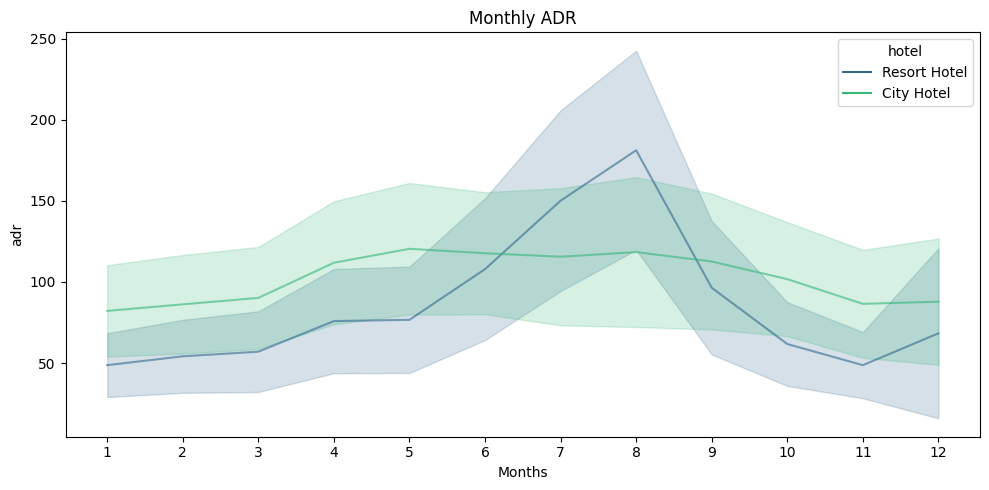

In [12]:
plt.figure(figsize = (10, 5))

months = confirmed_bookings['arrival_date_month'].unique()

sns.lineplot(x = 'arrival_date_month', y = 'adr', hue = 'hotel', data = confirmed_bookings, ci = 'sd', palette = 'viridis', alpha = 0.6)
plt.title('Monthly ADR')
plt.xlabel('Months')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

### Variable arrival_date_month
 Mes de la fecha de llegada


In [13]:
df["arrival_date_month"].dtype
df["arrival_date_month"].describe()

count    119390.000000
mean          6.552483
std           3.090619
min           1.000000
25%           4.000000
50%           7.000000
75%           9.000000
max          12.000000
Name: arrival_date_month, dtype: float64

De lo anterior:

* La variable toma valores entre 1 y 12 meses.
* Promedio: Julio
* En relación a los cuartiles:
* El 25% de los arribos son en Abril
* El 50% de los arribos son en Agosto
* El 75% de los arribos son en Septiembre


#### Hay un pico en el mes de agosto, lo cual es lógico ya que es el mes con mayor número de llegadas.

### Mes con más llegada de huéspedes 

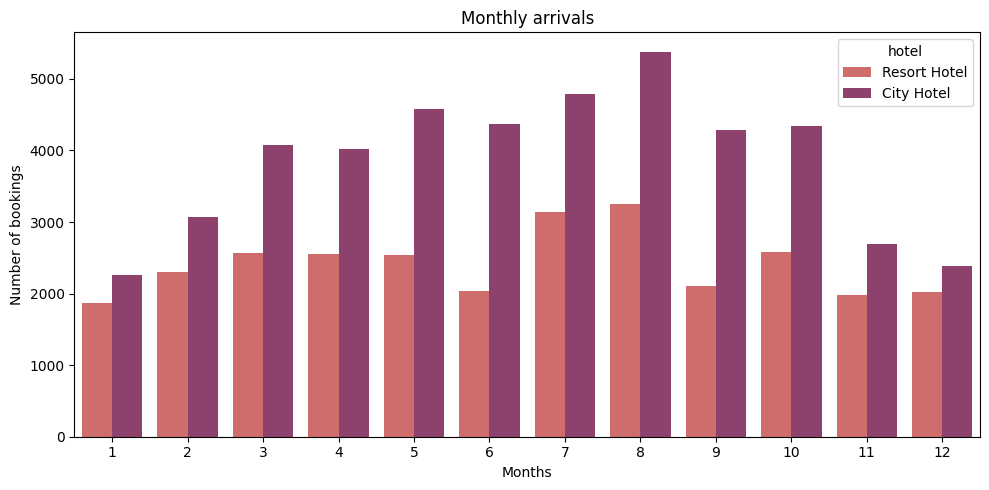

In [14]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'arrival_date_month', data = confirmed_bookings, hue = 'hotel', palette = 'flare')
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')

plt.tight_layout()

In [36]:
moda = df["arrival_date_month"].mode()
print(moda)


0    8
Name: arrival_date_month, dtype: int64


In [37]:
media = df["arrival_date_month"].mean()
print(media)

6.552483457576011


In [38]:
mediana = df["arrival_date_month"].median()
print(mediana)

7.0


#### Agosto y julio son los meses con mayor número de llegadas para ambos hoteles, como promedio. Una moda en Agosto, y mediana en Julio

### ¿Cuánto tiempo tienden a permanecer las huéspedes en el hotel? 

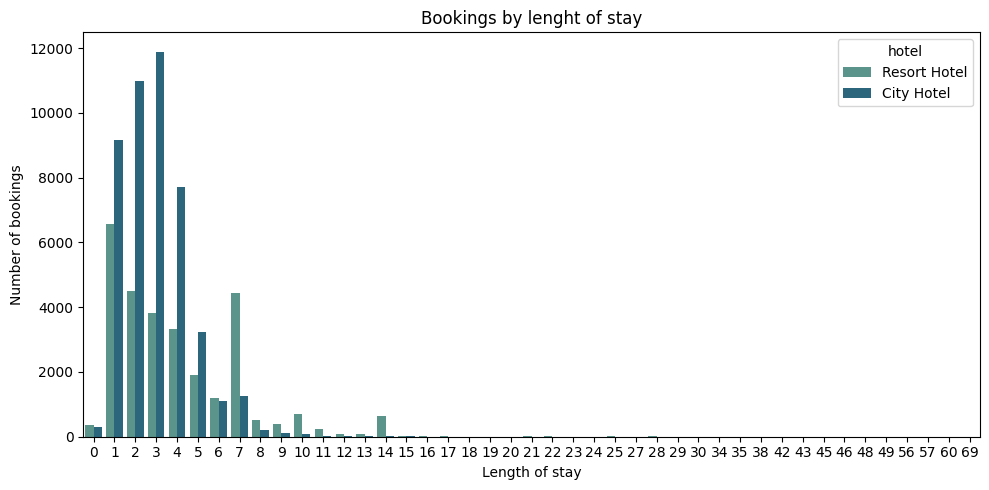

In [15]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'total_nights', data = confirmed_bookings, hue = 'hotel', palette = 'crest')
plt.title('Bookings by lenght of stay')
plt.xlabel('Length of stay')
plt.ylabel('Number of bookings')

plt.tight_layout()

In [16]:
df["total_nights"].dtype
df["total_nights"].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_nights, dtype: float64


#### Los huéspedes prefieren pasar entre 1 y 4 días en el hotel, aunque en el caso del resort hay más estancias de mayor duración.

## Analisis Multivariado

In [17]:
# Columnas de 'df.describe() que quiero examinar
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']


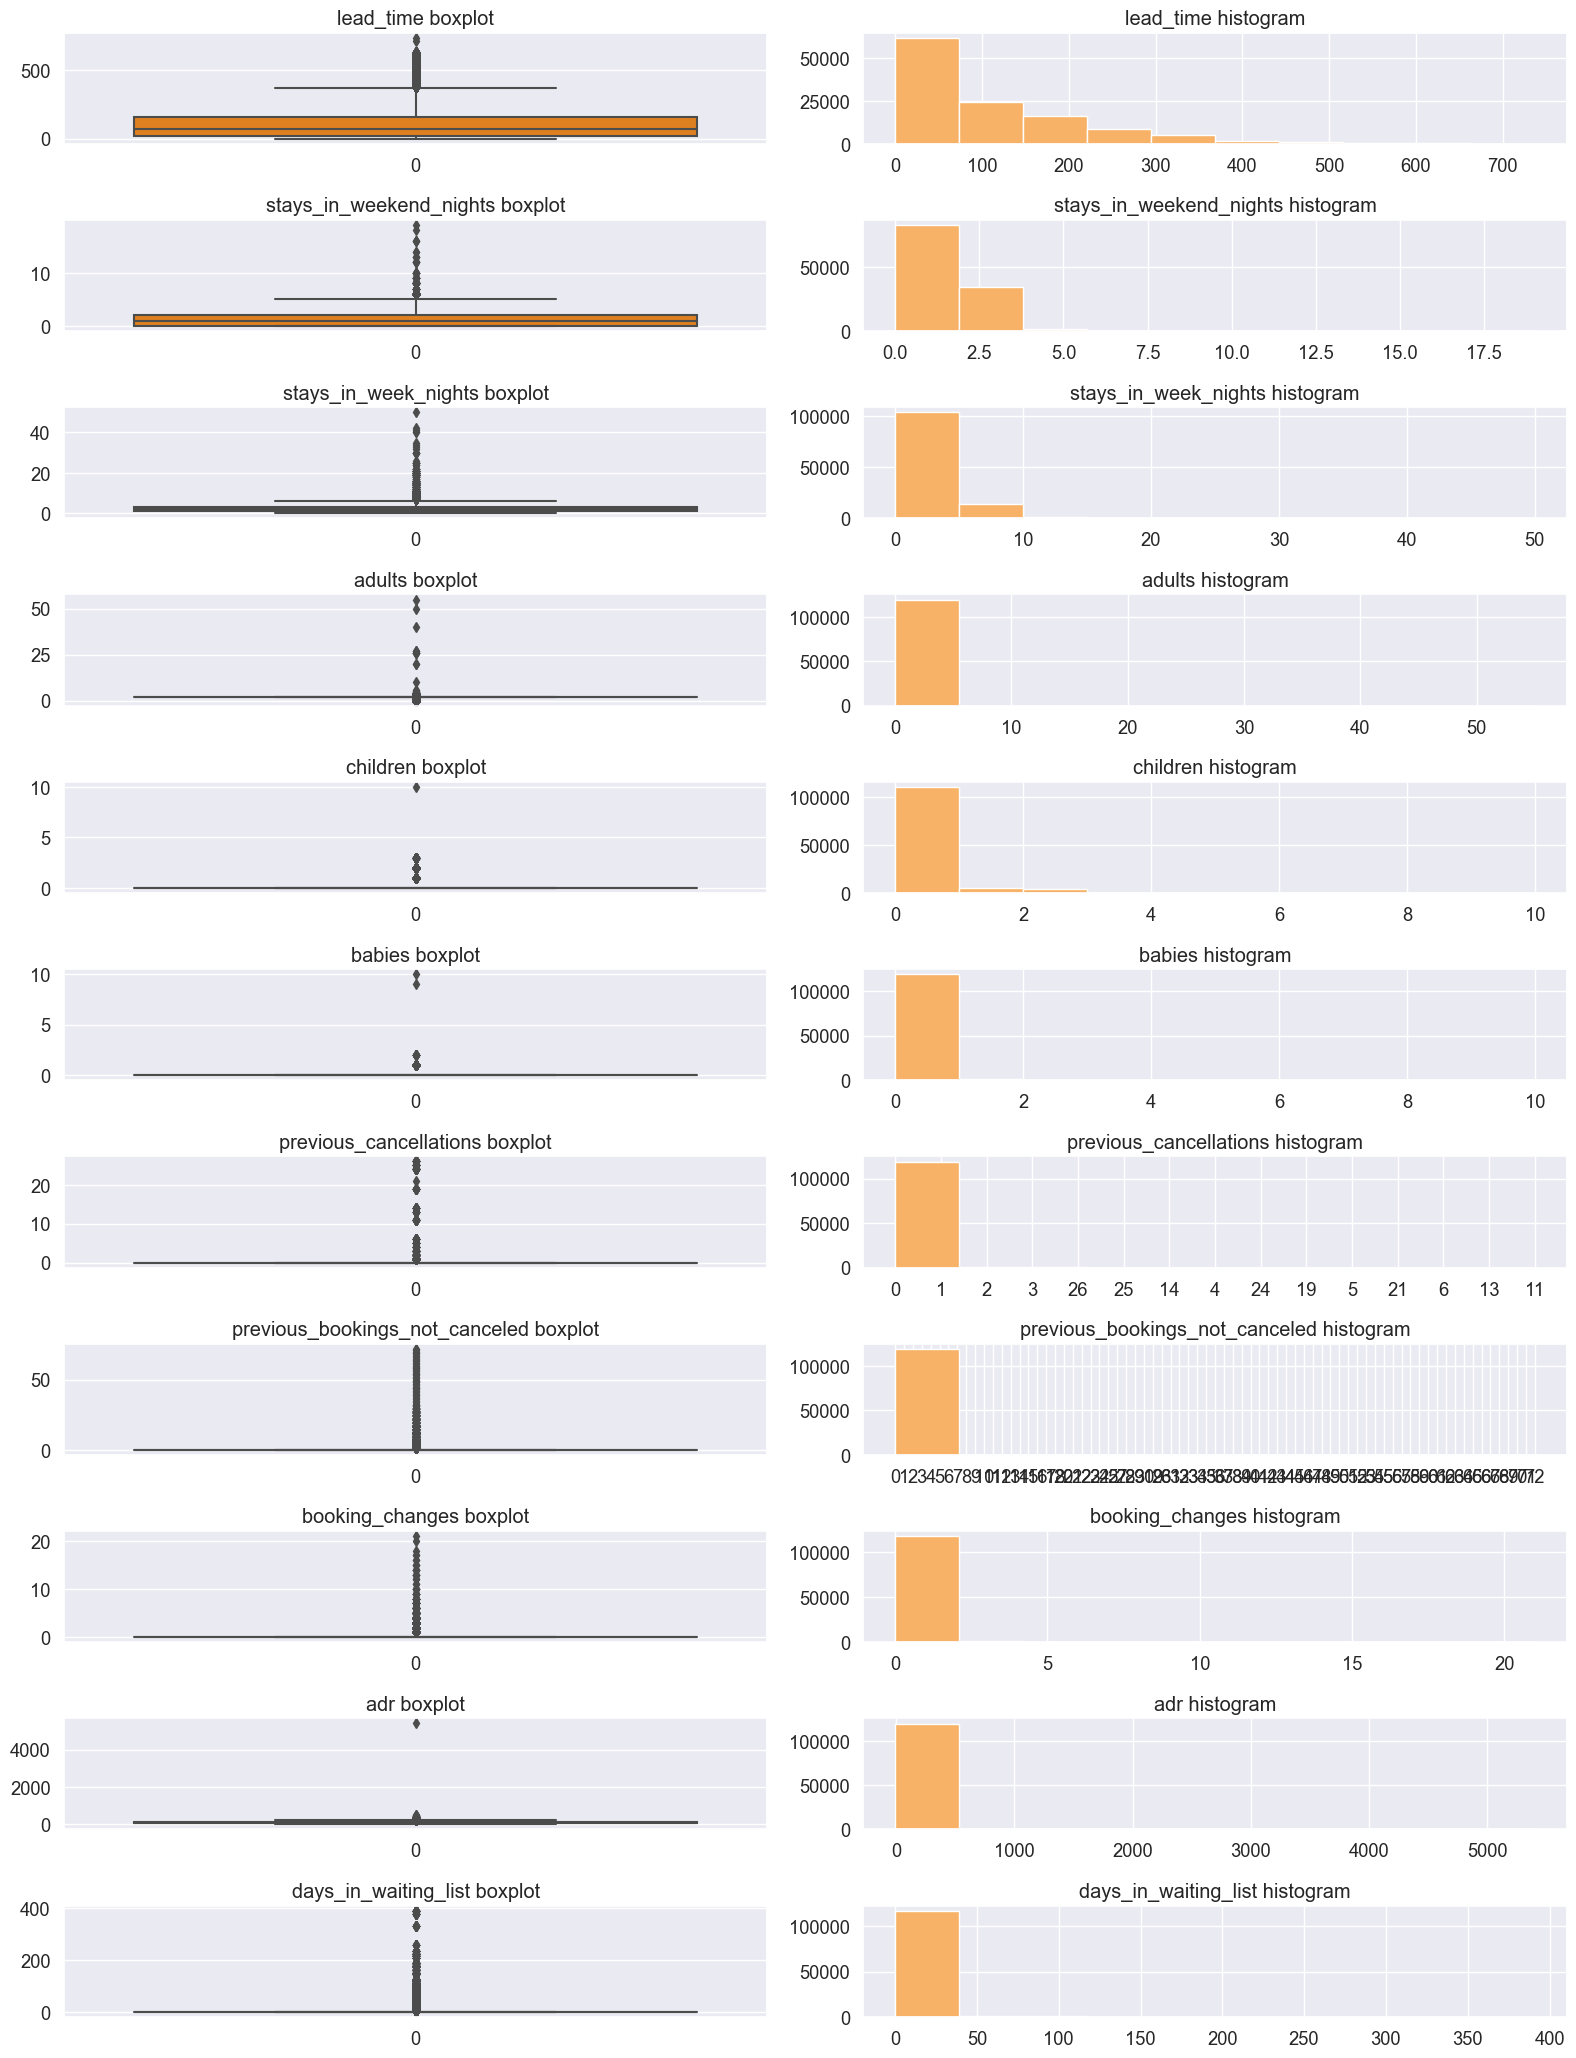

In [18]:
# Creando un Boxplot y un Histograma para deteccion de outlier's
n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16, 28))

for feature in features:
    plt.subplot(15,2,n)
    sns.boxplot(df[feature], palette = 'autumn').set(xlabel = None)
    plt.title(f'{feature} boxplot')
    n = n + 1
    
    plt.subplot(15,2,n)
    plt.hist(df[feature], color = '#f7b267')
    plt.title(f'{feature} histogram')
    n = n + 1
    plt.tight_layout()

Es evidente que hay outliers en el conjunto de datos. Lo relevante es su cantidad y los valores extremos que tienen.

Por ejemplo en la columna adr podemos ver un valor atípico con un valor aproximado de 5400, muy alejado del resto de puntos de datos. En este caso podríamos considerar que se trata de un error al introducir los datos en la base de datos.


In [43]:
df["adr"].dtype
df["adr"].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64


Sin embargo, en otras columnas hay outliers con valores bastante similares entre sí. Esto me ha hecho pensar que el problema puede residir en que el conjunto de datos contiene datos de dos hoteles diferentes. Normalmente, los hoteles urbanos son más baratos y pueden alojar a tipos de clientes más diversos dada su céntrica ubicación. Por el contrario, un resort suele ser un alojamiento más caro que un hotel, ya que ofrece muchas más prestaciones, incluyendo habitaciones más grandes o incluso villas (lo que podría explicar por qué hay reservas con un gran número de adultos).

Sin embargo, antes de tratar los outliers crearé una visualización que permita visualizar las diferencias en la distribución de los datos para cada hotel.

C:\Users\Usuario-pc\AppData\Local\Temp\ipykernel_9716\79977047.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = df['hotel'], y = df[feature], palette = 'summer').set(xlabel = None, ylabel = None)
C:\Users\Usuario-pc\AppData\Local\Temp\ipykernel_9716\79977047.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = df['hotel'], y = df[feature], palette = 'summer').set(xlabel = None, ylabel = None)
C:\Users\Usuario-pc\AppData\Local\Temp\ipykernel_9716\79977047.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = df['hotel'], y = df[feature], palette = 'summer').set(xlabel = None, ylabel = None)
C:\Users\Usuario-pc\AppData\Local\Temp\ipykernel_9716\79977047.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = df['hotel'], y = df[feature], palette = 'summer').set(xlabel = None, ylabel = None)
C:\Users\Usuario

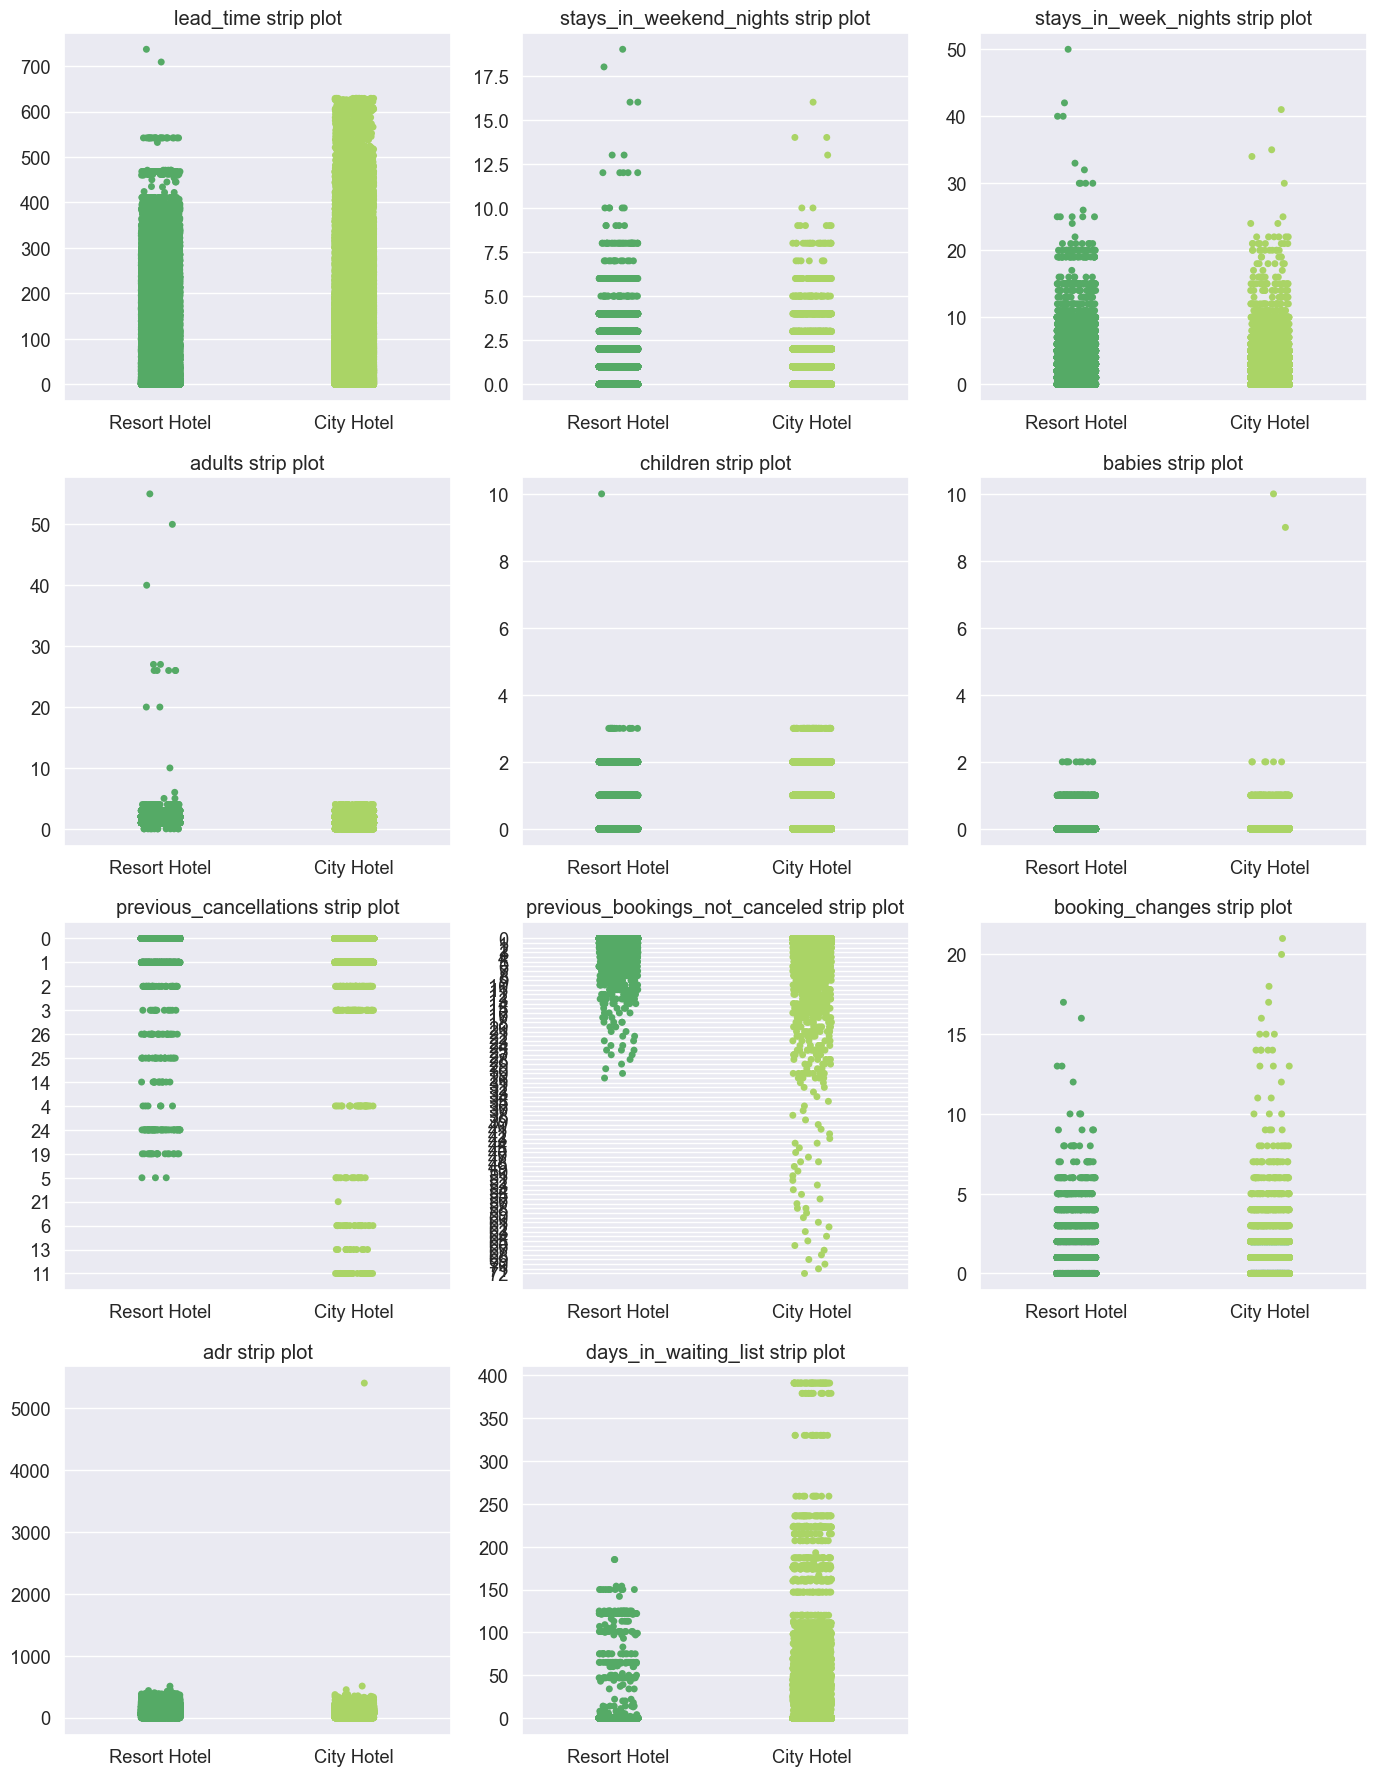

In [19]:
# Creando un stripplot para visualizar diferencias en la distribucion de datos entre hoteles

features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (14, 18))

for feature in features:
    plt.subplot(4,3,n)
    sns.stripplot(x = df['hotel'], y = df[feature], palette = 'summer').set(xlabel = None, ylabel = None)
    plt.title(f'{feature} strip plot')
    n = n + 1
    plt.tight_layout()


En la columna lead_time los datos empiezan a ser más dispersos a partir del valor 400, aproximadamente.

In [28]:
df["lead_time"].dtype
df["lead_time"].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

Las columnas stays_in_weekend_nights y stays_in_week_nights muestran valores atípicos más altos para el resort que para el hotel urbano, aunque ambos hoteles empiezan a mostrar datos más dispersos a los 6 y 10 días, para cada columna.

In [46]:
df["total_nights"].dtype
df["total_nights"].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_nights, dtype: float64

En el caso del número de adultos por reserva, está claro que los outliers son sólo para el complejo turístico, ya que la distribución para el hotel urbano no es muy dispersa. Por lo tanto, podría ser cierto que el resort que estamos estudiando tenga villas u ofrezca servicios a grandes grupos de huéspedes, lo que explicaría por qué hay reservas para un gran número de adultos. 
En las columnas de niños y bebés podemos ver tres puntos de datos con valores muy altos, suficientes para pensar que podría tratarse de un error al introducir los datos de la reserva.


In [47]:
df["adults"].dtype
df["adults"].describe()

count    119390.000000
mean          1.856403
std           0.579261
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

La variable booking_changes tiene una distribución similar para ambos hoteles, viendo que es extremadamente inusual que una reserva realice más de 5 cambios.

In [48]:
df["booking_changes"].dtype
df["booking_changes"].describe()

count    119390.000000
mean          0.221124
std           0.652306
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: booking_changes, dtype: float64

La columna days_in_waiting_list se refiere al número de días transcurridos desde que se hizo la reserva hasta que se confirmó al cliente. Según el gráfico de bandas, los datos son muy dispersos, siendo inusual que una reserva tenga un periodo de espera de más de 1 día, prácticamente.

In [49]:
df["days_in_waiting_list"].dtype
df["days_in_waiting_list"].describe()

count    119390.000000
mean          2.321149
std          17.594721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

Por último, en las columnas previous_cancellations y previous_bookings_not_canceled podemos ver el número de reservas, anteriores a la actual, que fueron o no canceladas por el cliente. Según el gráfico, podemos ver que estas variables alcanzan valores muy altos. Por ejemplo, en el complejo turístico, hay registros en los que el cliente realizó más de 20 cancelaciones previas a la reserva actual.

In [50]:
df["previous_bookings_not_canceled"].dtype
df["previous_bookings_not_canceled"].describe()

count     119390
unique        73
top            0
freq      115770
Name: previous_bookings_not_canceled, dtype: object

In [51]:
df["previous_cancellations"].dtype
df["previous_cancellations"].describe() 

count     119390
unique        15
top            0
freq      112906
Name: previous_cancellations, dtype: object


Al principio parece un valor ilógico. Explorando el conjunto de datos, podemos descubrir que la mayoría de estas reservas fueron realizadas por empresas. Cada vez que la misma empresa vuelve a reservar, una de las dos variables aumenta (dependiendo, por supuesto, de si la reserva anterior fue cancelada o no). Por lo tanto, el alto valor de estas variables podría explicarse por la presencia de empresas que utilizan regularmente estos hoteles para alojar a sus empleados.

Sin embargo, también se observa que hay reservas realizadas por particulares en las que estas variables alcanzan valores elevados. 

# Conclusiones

Según el análisis, ambos hoteles se están viendo afectados por un alto índice de cancelaciones. El hecho de que una gran parte de estas reservas no tuvieran depósito indica que los clientes son más propensos a cancelar una reserva cuando no se les exige un depósito. La empresa debería cambiar la política de cancelación para hacerla un poco más restrictiva. Además, debería realizar una breve encuesta a los clientes cuando cancelan una reserva para averiguar por qué lo hacen.

Por otro lado, el número de clientes que repiten es muy bajo, por lo que se podría crear una estrategia de fidelización, especialmente para los clientes procedentes de Portugal, ya que son los principales clientes de ambos hoteles. Además, su proximidad a ambos hoteles aumentaría la probabilidad de que repitieran estancia.

También sería recomendable realizar una encuesta de satisfacción a los clientes que confirmen su estancia para conocer sus impresiones generales sobre los servicios ofrecidos. Por ejemplo, según los datos, el régimen de alojamiento y desayuno es el más solicitado, por lo que sería importante comprobar que su calidad cumple las expectativas de los clientes.

En cuanto a segmentos de mercado y canales de distribución, la AT y la TO se han mostrado como los más fuertes, seguidos del canal directo con el hotel. En este último caso, se podría incentivar el uso de este canal mediante una oferta especial.

Por último, la baja ocupación de habitaciones por adultos con niños parece indicar que ninguno de los hoteles tiene un ambiente familiar. En consecuencia, cabría plantearse qué servicios podrían incluirse para atraer a este tipo de clientes o si, por el contrario, habría que centrar los esfuerzos en atraer al hotel a parejas y grupos de adultos, ofreciendo servicios más exclusivos.

